# Exercise 1
AdaBoost on a uni-dimensional array

Given the dataset below and the AdaBoost algorithm using the usual decision stumps as weak learners:

1. Plot the dataset using `pyplot`.
2. Draw the decision surface corresponding to the first weak learner.
3. What are the values of $\epsilon_1$ (training error of the first decision stump) and $\alpha_1$ (the "weight" of the vode of the first decision stump)?
4. What will be the updated weights of the training instances, after the first update?
5. Draw the decision surface after adding the second weak learner.

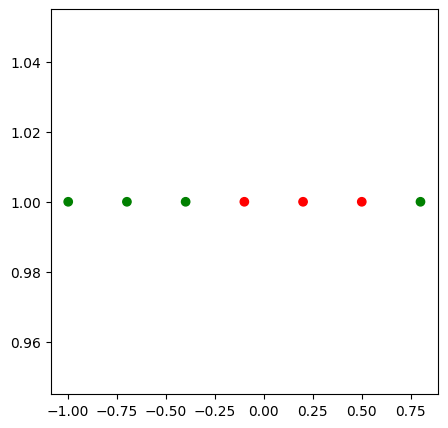

[0.14285714]
[1.79175947]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from tools.plots import plot_decision_surface

d = pd.DataFrame({
    'X': [-1, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8],
    'Y': [1, 1, 1, -1, -1, -1, 1]
})
X, Y = d[['X']], d['Y']

c= ['green' if l == 1 else 'red' for l in Y]
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(X,[1]*7, color=c)
plt.show()

be = DecisionTreeClassifier(criterion='entropy', max_depth=1)
ab = AdaBoostClassifier(base_estimator=be, algorithm="SAMME", n_estimators=1).fit(X, Y)
# plot_decision_surface(ab, X, Y) # ???


print(ab.estimator_errors_)
print(ab.estimator_weights_)

# Exercise 2
AdaBoost on a two-dimensional array

Given the dataset below and the AdaBoost algorithm using the usual decision stumps as weak learners:
1. Plot the dataset using `pyplot`.
2. Draw the decision surface corresponding to the first weak learner as chosen by `AdaBoostClassifier` with the default `base_estimator`.
3. Show why AdaBoost chose that learner, by plotting the decision surface of all the candidates and their corresponding error rate.

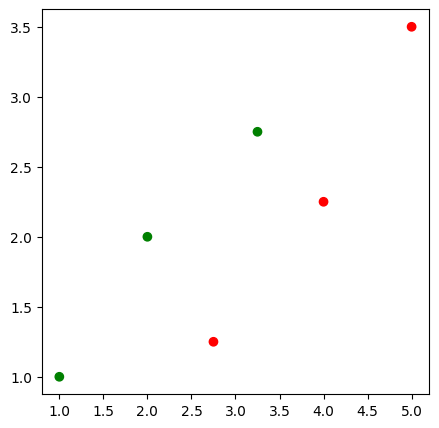

c:\Users\aiaco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


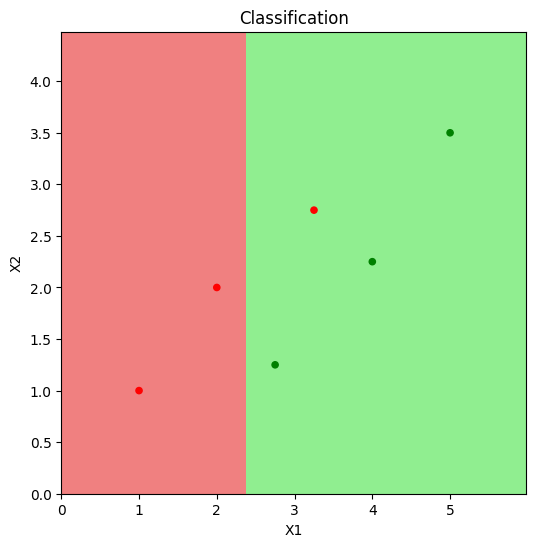

0.8333333333333334
[DecisionTreeClassifier(max_depth=1, random_state=964089938), DecisionTreeClassifier(max_depth=1, random_state=164403902)]
[0.16666667 0.1       ]
     X1    X2  Y
0  1.00  1.00  1
1  2.00  2.00  1
2  2.75  1.25 -1
3  3.25  2.75  1
4  4.00  2.25 -1
5  5.00  3.50 -1


In [4]:
import pandas as pd
d = pd.DataFrame({
    'X1': [1, 2, 2.75, 3.25, 4, 5],
    'X2': [1, 2, 1.25, 2.75, 2.25, 3.5],
    'Y': [1, 1, -1, 1, -1, -1]
})
X, Y = d[['X1', 'X2']], d['Y']

c= ['green' if l == 1 else 'red' for l in Y]
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(X['X1'], X['X2'], color=c)
plt.show()

ab = AdaBoostClassifier(algorithm="SAMME", n_estimators=2).fit(X, Y)
plot_decision_surface(ab, X, Y)
print(ab.score(X,Y))
print(ab.estimators_)
print(ab.estimator_errors_)

print(d)

# Exercise 3
AdaBoost vs ID3

Given the dataset below:
1. Plot the dataset using `pyplot`.
2. Compare the training error of the AdaBoost algorithm (using the usual decision stumps as weak learners) and the ID3 algorithm.
2. Compare the CVLOO error of the AdaBoost algorithm (using the usual decision stumps as weak learners) and the ID3 algorithm.

In [36]:
from scipy.stats import norm
import pandas as pd
import numpy as np
x_red = norm.rvs(0, 1, 100, random_state=1)
y_red = norm.rvs(0, 1, 100, random_state=2)
x_green = norm.rvs(1, 1, 100, random_state=3)
y_green = norm.rvs(1, 1, 100, random_state=4)
d = pd.DataFrame({
    'X1': np.concatenate([x_red,x_green]),
    'X2': np.concatenate([y_red,y_green]),
    'Y': [1]*100+[0]*100
})
X, Y = d[['X1', 'X2']], d['Y']

## Exercise 4
Finding the optimum number of weak learners

For the dataset below:
1. plot the points using `pyplot.scatter`;
1. plot a line chart using `pyplot.plot` that shows the training error and the CVLOO error of AdaBoost using between 1 and 15 weak learners.
1. What is the best number of weak learners in this case?

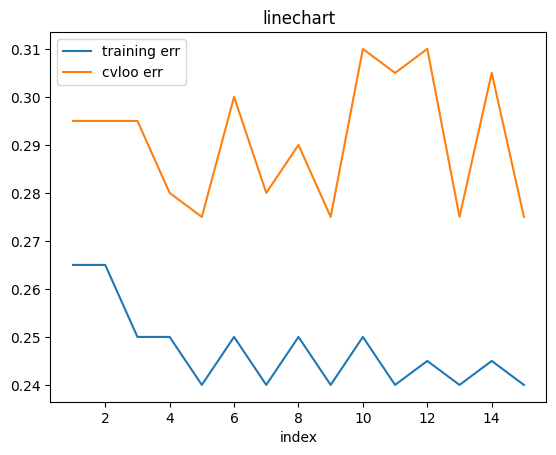

In [76]:
from scipy.stats import norm
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, LeaveOneOut


x_red = norm.rvs(0, 1, 100, random_state=1)
y_red = norm.rvs(0, 1, 100, random_state=2)
x_green = norm.rvs(1, 1, 100, random_state=3)
y_green = norm.rvs(1, 1, 100, random_state=4)
d = pd.DataFrame({
    'X1': np.concatenate([x_red,x_green]),
    'X2': np.concatenate([y_red,y_green]),
    'Y': [1]*100+[0]*100
})
X, Y = d[['X1', 'X2']], d['Y']

c= ['green' if l == 1 else 'red' for l in Y]
# fig, ax = plt.subplots(figsize=(5, 5))
# plt.scatter(X['X1'], X['X2'], color=c)
# plt.show()

training, cvloo, x = [], [], []
loo = LeaveOneOut()
for index in range(1,16):
    ab = AdaBoostClassifier(algorithm="SAMME", n_estimators=index).fit(X, Y)
    x.append(index)
    cvloo.append(1- np.mean(cross_val_score(ab, X, Y, cv = loo)))
    training.append(1 - ab.score(X,Y))
    #print(f"t={index}, cvloo = {cvloo[index-1]}, training = {training[index-1]}")


plt.plot(x, training, label = "training err")
plt.plot(x, cvloo, label = "cvloo err")
plt.legend()
plt.title('linechart')
plt.xlabel('index')
plt.show()

# best is 5